In [1]:
import pandas as pd

file_path = 'spotify_tracks.csv'  # Tam dosya yolunu buraya girin
data = pd.read_csv(file_path)

# Veri hakkında genel bilgi
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [2]:
# En popüler 10 şarkıyı listele
top_tracks = data.nlargest(10, 'popularity')[['track_name', 'artist_name', 'popularity']]
print(top_tracks)


                                              track_name  \
49479                                          Big Dawgs   
26432                                    Blinding Lights   
26580                                            Starboy   
54962  Bye Bye Bye - From Deadpool and Wolverine Soun...   
23702                                          Anti-Hero   
24273                                           cardigan   
21767                           Something Just Like This   
22876                                     Counting Stars   
23514  Is It Over Now? (Taylor's Version) (From The V...   
24274                                             august   

                      artist_name  popularity  
49479          Hanumankind, Kalmi          93  
26432                  The Weeknd          91  
26580       The Weeknd, Daft Punk          91  
54962                      *NSYNC          90  
23702                Taylor Swift          89  
24273                Taylor Swift          89  
217

In [3]:
# Yıllara göre ortalama popülerlik
yearly_popularity = data.groupby('year')['popularity'].mean()
print(yearly_popularity)


year
1971    30.666667
1972    26.809524
1973    27.064516
1974    31.000000
1975    37.368421
1976    39.333333
1977    34.461538
1978    30.571429
1979    31.608696
1980    24.550000
1981    14.135135
1982    12.560976
1983    12.625000
1984     8.699531
1985    12.664062
1986    11.123077
1987    13.766667
1988     8.421739
1989    12.198653
1990     9.947115
1991    10.347015
1992     7.901235
1993     8.057377
1994    10.367816
1995    11.859956
1996    12.555556
1997    11.172330
1998    13.852740
1999    12.554054
2000    21.223404
2001    19.744422
2002    14.985830
2003    14.974747
2004    16.070209
2005    12.546838
2006    12.980916
2007    13.739884
2008    15.575230
2009    18.457699
2010    18.106423
2011    19.302899
2012    19.530280
2013    13.496728
2014    15.266954
2015    16.069688
2016    17.820276
2017    16.578039
2018    15.261528
2019    16.875668
2020    21.068807
2021    19.292365
2022    14.985331
2023    13.719932
2024     9.788339
Name: popularity, dtype

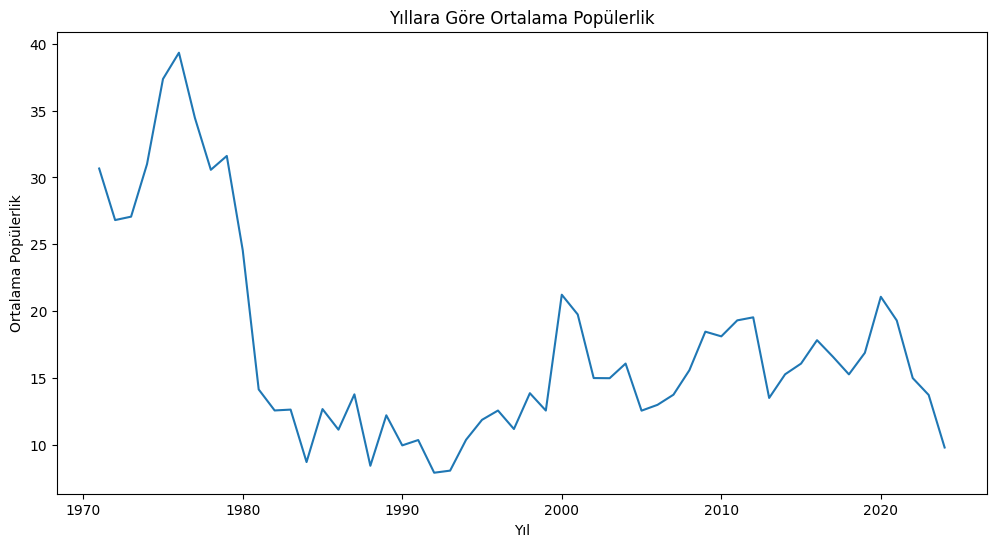

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_popularity)
plt.title('Yıllara Göre Ortalama Popülerlik')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Popülerlik')
plt.show()


In [8]:
high_dance_energy = data[(data['danceability'] > 0.8) & (data['energy'] > 0.8)]

print("Yüksek Danceability ve Energy'ye Sahip Şarkılar:")
print(high_dance_energy[['track_name', 'artist_name', 'danceability', 'energy']])


Yüksek Danceability ve Energy'ye Sahip Şarkılar:
                                track_name  \
114             Private Party (From "Don")   
167              7UP Super Duper Refresher   
220                             Shake That   
285             Private Party (From "Don")   
289                          Private Party   
...                                    ...   
62284  K For Kabaradakkam - Electronic Mix   
62289   Amakkalam - From "Think Originals"   
62299          Ticky Ticky Taa - House Mix   
62303        Adi Odi - From "Atti Culture"   
62316      Moonu Moonu Moonu (From "3:33")   

                                             artist_name  danceability  energy  
114                   Anirudh Ravichander, Jonita Gandhi         0.865   0.877  
167                                  Anirudh Ravichander         0.885   0.892  
220                                  Anirudh Ravichander         0.825   0.857  
285                   Anirudh Ravichander, Jonita Gandhi         0.862   0

<Figure size 1200x600 with 0 Axes>

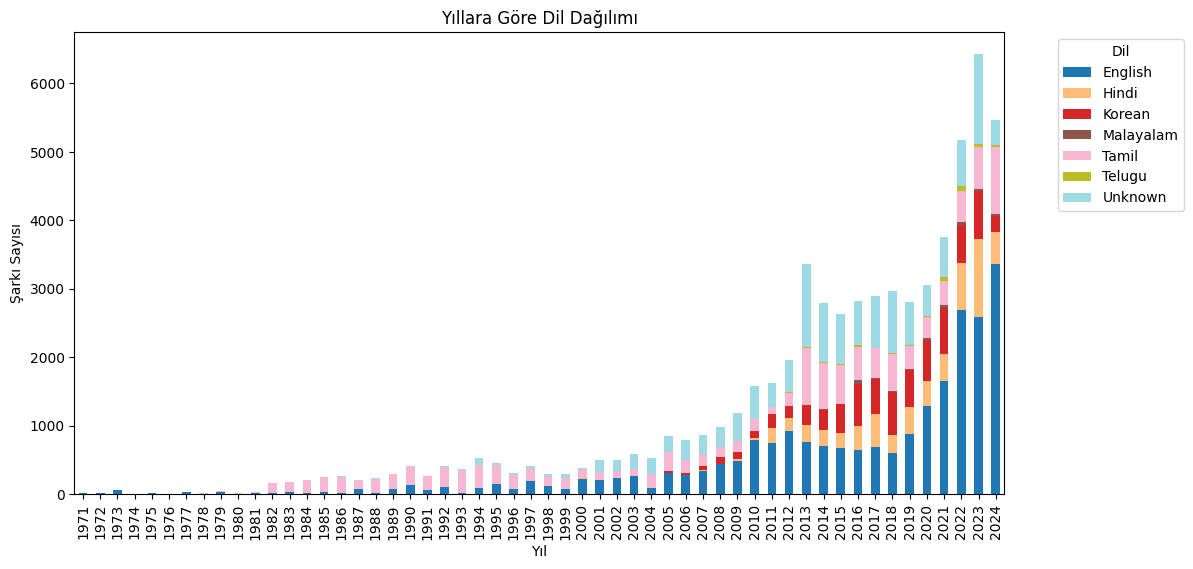

In [9]:
language_yearly = data.groupby(['year', 'language']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
language_yearly.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Yıllara Göre Dil Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.legend(title='Dil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [10]:
top_tracks = data.nlargest(10, 'popularity')[['track_name', 'artist_name', 'popularity']]

print("En Popüler 10 Şarkı:")
print(top_tracks)


En Popüler 10 Şarkı:
                                              track_name  \
49479                                          Big Dawgs   
26432                                    Blinding Lights   
26580                                            Starboy   
54962  Bye Bye Bye - From Deadpool and Wolverine Soun...   
23702                                          Anti-Hero   
24273                                           cardigan   
21767                           Something Just Like This   
22876                                     Counting Stars   
23514  Is It Over Now? (Taylor's Version) (From The V...   
24274                                             august   

                      artist_name  popularity  
49479          Hanumankind, Kalmi          93  
26432                  The Weeknd          91  
26580       The Weeknd, Daft Punk          91  
54962                      *NSYNC          90  
23702                Taylor Swift          89  
24273                Taylor Sw

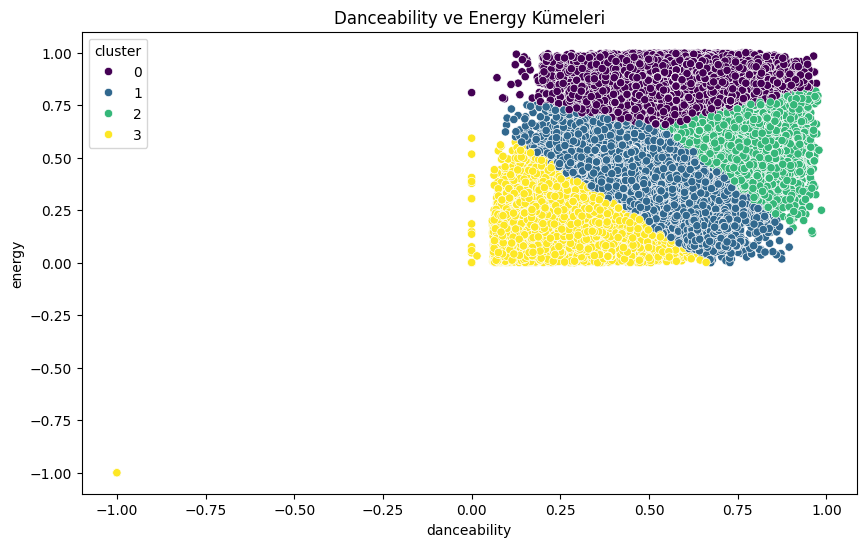

In [12]:
from sklearn.cluster import KMeans

# Danceability ve Energy'yi seç
features = data[['danceability', 'energy']]

# Kümelenme modeli oluştur
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Kümeleri görselleştir
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='danceability', y='energy', hue='cluster', palette='viridis')
plt.title('Danceability ve Energy Kümeleri')
plt.show()
